# Final Assignment: Bike Sharing Demand Dataset
## Task 1: Describe the Dataset
1. Read the CSV file with pandas.read_csv and parse the datetime
column.
    - we're printing values.head() to see the first five rows of our csv file
    - values.info() could be used for general type and column declaration 


In [2]:
import pandas as pd
import numpy as np

values = pd.read_csv("day.csv")

df = pd.DataFrame({
    "target": values["cnt"],
    "datetime": pd.to_datetime(values["dteday"]),
    "weather_feature": values["weathersit"],
    "temperature_feature": values["temp"],
    "humidity_feature": values["hum"],
    "windspeed_feature": values["windspeed"],
    "season_feature": values["season"],
    "holiday_feature": values["holiday"],
    "working_day_feature": values["workingday"],
    "weekday_feature": values["weekday"]
})

df.head()

,target,datetime,weather_feature,temperature_feature,humidity_feature,windspeed_feature,season_feature,holiday_feature,working_day_feature,weekday_feature
0,985,2011-01-01,2,0.344167,0.805833,0.160446,1,0,0,6
1,801,2011-01-02,2,0.363478,0.696087,0.248539,1,0,0,0
2,1349,2011-01-03,1,0.196364,0.437273,0.248309,1,0,1,1
3,1562,2011-01-04,1,0.200000,0.590435,0.160296,1,0,1,2
4,1600,2011-01-05,1,0.226957,0.436957,0.186900,1,0,1,3


2. Report:
    - *Number of rows and columns.*
        - rows: 731
        - columns: 16
    - *Time range covered by the data.*
        - By printing the parsed date and time columns, we're getting the range of any possible data.
        - dataset from 01.01.2011 to 31.12.2012



In [3]:

print("(rows, columns):", values.shape) # => 731 rows, 16 columns
print("\nDatetime: \n", df["datetime"])


(rows, columns): (731, 16)

Datetime: 
 0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: datetime, Length: 731, dtype: datetime64[ns]


- Target variable and list of feature variables (names and data types)
    - Target variable: 
        - Name: cnt / count of all currently rented bikes 
        - Type: Numeric
    -  feature variables: below

In [4]:
# values.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   target               731 non-null    int64         
 1   datetime             731 non-null    datetime64[ns]
 2   weather_feature      731 non-null    int64         
 3   temperature_feature  731 non-null    float64       
 4   humidity_feature     731 non-null    float64       
 5   windspeed_feature    731 non-null    float64       
 6   season_feature       731 non-null    int64         
 7   holiday_feature      731 non-null    int64         
 8   working_day_feature  731 non-null    int64         
 9   weekday_feature      731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 57.2 KB


- Create a variable description table

In [5]:
print("Description: \n", df.describe())

Description: 
             target             datetime  weather_feature  temperature_feature  \
count   731.000000                  731       731.000000           731.000000   
mean   4504.348837  2012-01-01 00:00:00         1.395349             0.495385   
min      22.000000  2011-01-01 00:00:00         1.000000             0.059130   
25%    3152.000000  2011-07-02 12:00:00         1.000000             0.337083   
50%    4548.000000  2012-01-01 00:00:00         1.000000             0.498333   
75%    5956.000000  2012-07-01 12:00:00         2.000000             0.655417   
max    8714.000000  2012-12-31 00:00:00         3.000000             0.861667   
std    1937.211452                  NaN         0.544894             0.183051   

       humidity_feature  windspeed_feature  season_feature  holiday_feature  \
count        731.000000         731.000000      731.000000       731.000000   
mean           0.627894           0.190486        2.496580         0.028728   
min            0.0

4. Check for:
    - *Missing values per column.*
    - *Duplicated rows (if any).*
    - there are no missing or dublicated rows

In [6]:
# Summary of missing values
print("Number of missing values:", values.isnull().sum().sum())

# Summary of dublicated rows
dRowsSum = values.duplicated(keep=False).sum().sum()
print ("dublicated rows:", dRowsSum)

Number of missing values: 0
dublicated rows: 0


## Description I
- *For numeric variables: calculate mean, standard deviation, minimum, maximum, and quartiles*
    - see the results above
- *For categorical variables: show frequency tables or bar charts (e.g. distribution of seasons or weather types).*

season_feature
1    181
2    184
3    188
4    178
dtype: int64


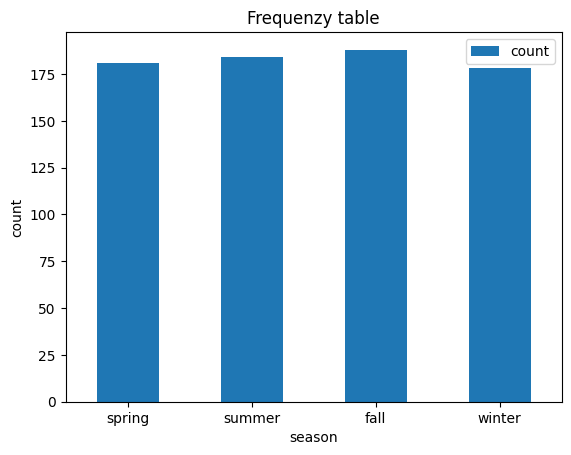

weather_feature
1    463
2    247
3     21
dtype: int64


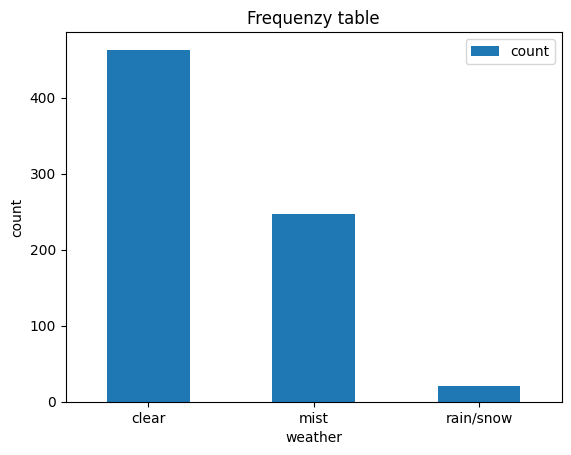

weekday_feature
0    105
1    105
2    104
3    104
4    104
5    104
6    105
dtype: int64


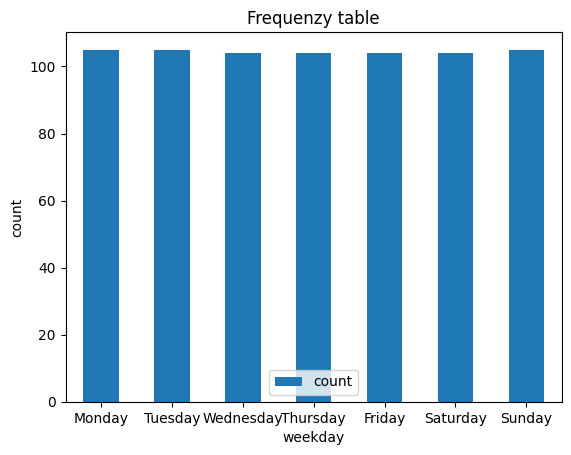

In [7]:
import matplotlib.pyplot as plt
cols = ["season_feature", "weather_feature", "weekday_feature"]    

szy = df.groupby(cols[0]).size()
print(szy)
szx = ["spring", "summer", "fall", "winter"]
df_season = pd.DataFrame({"season": szx,
             "count": szy})
ax = df_season.plot.bar(x='season', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("season")
plt.ylabel("count")
plt.show()


szy = df.groupby(cols[1]).size()
print(szy)
szx = ["clear", "mist", "rain/snow"]
df_season = pd.DataFrame({"weather": szx,
             "count": szy})
ax = df_season.plot.bar(x='weather', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("weather")
plt.ylabel("count")
plt.show()


szy = df.groupby(cols[2]).size()
print(szy)
szx = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_season = pd.DataFrame({"weekday": szx,
             "count": szy})
ax = df_season.plot.bar(x='weekday', y="count", rot=0)
plt.title("Frequenzy table")
plt.xlabel("weekday")
plt.ylabel("count")
plt.show()

## Visulisation
To plot the total bike demand over the full period, i've set the date as x value and the rent count as y value.

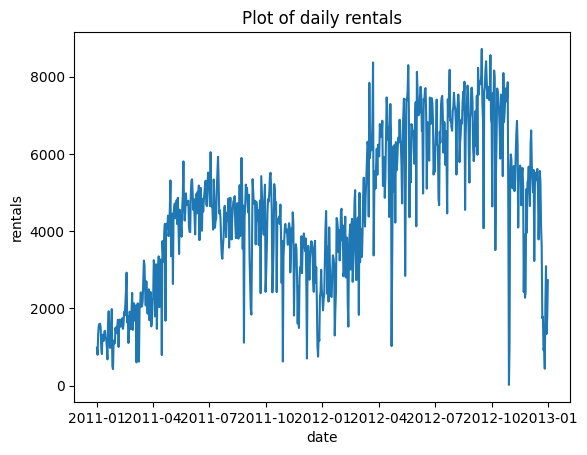

In [8]:
import matplotlib.pyplot as plt

x = df["datetime"]
y = df["target"]

plt.plot(x, y)
plt.title("Plot of daily rentals")
plt.xlabel("date")
plt.ylabel("rentals")
plt.show()

distibution of numeric variables - histograms of temp, humidity, windspeed

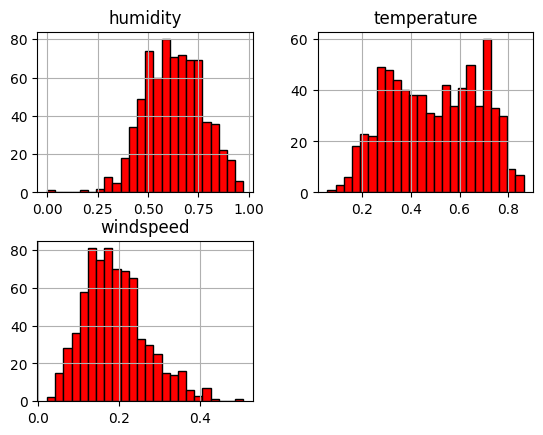

In [9]:
df_numeric = pd.DataFrame({
    "humidity": df["humidity_feature"],
    "temperature": df["temperature_feature"],
    "windspeed": df["windspeed_feature"]
})

df_numeric.hist(bins =2*12 , color = "red" ,
edgecolor = "black")
plt.show()


- *Plot aggregated demand by season, day of week or hour of day (e.g. bar charts or line plots)*

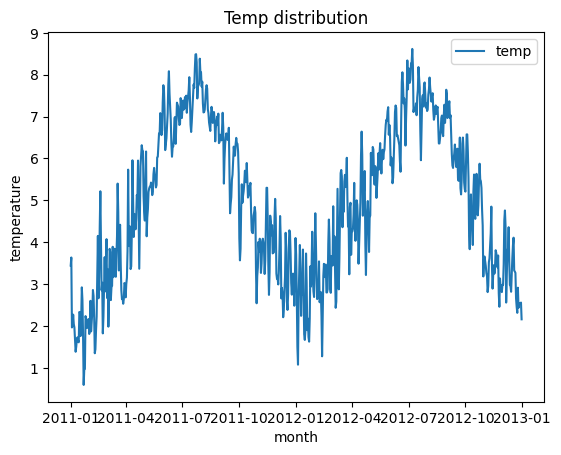

In [10]:
plt.plot(df["datetime"], df["temperature_feature"] * 10, label="temp")
plt.title("Temp distribution")
plt.xlabel("month" )
plt.ylabel( "temperature" )
plt.legend()
plt.show()


- *Write a short text summary (3–5 sentences) describing main patterns you observe (seasonality, daily patterns, influence of weather, etc.).*

During season 2 and 3, the rent business is getting the most requests. On the last chart you can see equalities between the amount of rents and the temperature (same highs and lows). Even wind could be a small factor. With less wind, more people want to rent bikes.

## Preprocessing
- *Encode categorical variables (e.g. one-hot encoding for season, weather, weekday).*
- *Split the data into training, validation and test sets (for example 70 % / 10 % / 20 %) and scale numeric features using statistics from the training set only.*

     season_feature  weather_feature  weekday_feature  temperature_feature  \
0                 1                2                6             0.344167   
1                 1                2                0             0.363478   
2                 1                1                1             0.196364   
3                 1                1                2             0.200000   
4                 1                1                3             0.226957   
..              ...              ...              ...                  ...   
726               1                2                4             0.254167   
727               1                2                5             0.253333   
728               1                2                6             0.253333   
729               1                1                0             0.255833   
730               1                2                1             0.215833   

     humidity_feature  windspeed_feature  holiday_feature  \
0 

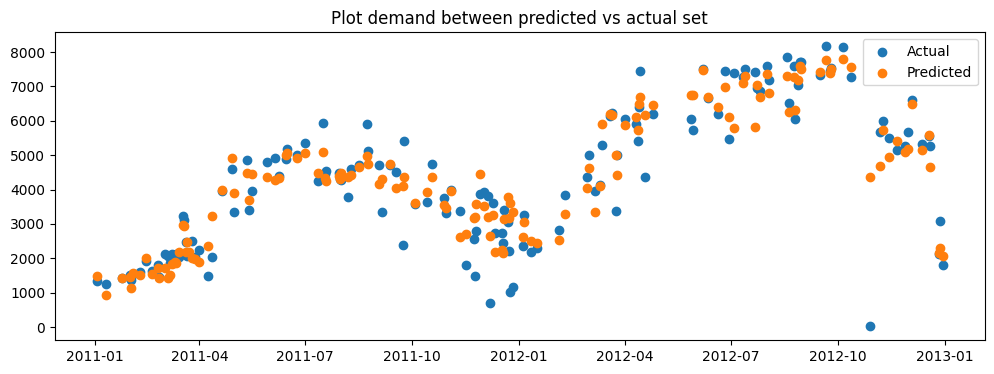

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
# encode categorical features
features = [
    "temperature_feature",
    "humidity_feature",
    "windspeed_feature",
    "holiday_feature",
    "working_day_feature"]
# onehot encoding 
df_categorical_encoded = pd.get_dummies(df[cols], dtype=int)
df_numeric = df[features]

df_features = pd.concat([df_categorical_encoded, df_numeric, pd.to_numeric(df["datetime"])], axis=1)
print(df_features)

# splitting data
from sklearn.model_selection import train_test_split
rand = 42
X = df_features
y = df["target"]
x_train_validation, x_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.2, random_state=rand)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_validation, y_train_validation, test_size=0.125, random_state=rand)

# train model
model = RandomForestRegressor(random_state=rand)
model.fit(x_train, y_train)

# evaluation
y_pred = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
print(root_mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

print(y_test)

plt.figure(figsize=(12,4))
plt.scatter(pd.to_datetime(x_test["datetime"]), y_test, label="Actual")
plt.scatter(pd.to_datetime(x_test["datetime"]), y_pred, label="Predicted")
plt.legend()
plt.title("Plot demand between predicted vs actual set")
plt.show()

## User-input predicition function
- Implement a Python function (or cell) that:
    - Accepts user inputs (e.g. season, weather, temp, humidity,windspeed, hour, weekday, is_holiday, is_workingday).
    - Applies the same preprocessing and scaling steps.
    - Uses the trained model to output a predicted count of bikes

In [12]:
def user_input_prediction(
        season, 
        weather, 
        temp, 
        humidity, 
        windspeed, 
        weekday, 
        is_holiday, 
        is_workingday, 
        date):
    # todo use trained model to output predicition on bike demand
    new_df = pd.DataFrame({
        "season_feature": [season],
        "weather_feature": [weather],
        "weekday_feature": [weekday],
        "temperature_feature": [temp],
        "humidity_feature": [humidity],
        "windspeed_feature": [windspeed],
        "holiday_feature": [is_holiday],
        "working_day_feature": [is_workingday],
        "datetime": date
    })
    pred = model.predict(new_df)
    print(pred)


user_input_prediction(
    2, # summer
    1, # clear weather
    0.6,
    0.1,
    1.0,
    6, # Sunday
    1, # holiday
    0,
    pd.to_numeric(pd.to_datetime(["2011-01-04"]))
)

user_input_prediction(
    1, # spring
    1, # clear weather
    0.138333,
    0.434167,
    0.36195,
    3, # Thursday
    0,
    1, # Workingday
    pd.to_numeric(pd.to_datetime(["2011-01-04"]))
)

user_input_prediction(
    4, # Winter
    4, # snow
    0.0,
    1.0,
    1.0,
    0, # Monday 
    0,
    1, # Workingday
    pd.to_numeric(pd.to_datetime(["2011-01-04"]))
)

[2548.14]
[1454.03]
[843.08]


- *Demonstrate several example predictions for different scenarios and briefly interpret the results.*

1. Summer time with good weather and other perfect conditions
    - the model predicted a high rent rate
2. Good weather as well, but in spring and a working day
    - worse conditions compared to the first
    - less rents predicted compared to the first prediction
3. Very worse conditions
    - model predicted less rents than the upper scenarios

With that bad conditions from scenario 3, we would expect, that the model predicts even less rents on that day. But it tends very to good predictions, on that small amount of training data. 

## 3. 30-Day-Forecast

In [ ]:
# -----------------------------
# Encode categorical features
# -----------------------------

# numerical features that do not need one-hot encoding
features = [
    "temperature_feature",
    "humidity_feature",
    "windspeed_feature",
    "holiday_feature",
    "working_day_feature"
]

# create a copy of the dataset to work with
df_lag = df.copy()

# one-hot encode categorical columns (e.g. season, weather, weekday)
df_categorical_encoded = pd.get_dummies(df_lag[cols], dtype=int)

# select numeric features
df_numeric = df_lag[features]

# combine categorical features, numeric features and datetime
df_features = pd.concat(
    [df_categorical_encoded, df_numeric, pd.to_numeric(df_lag["datetime"])],
    axis=1
)

# -----------------------------
# Split data into train/val/test
# -----------------------------

X = df_features          # input features
y = df["target"]         # value we want to predict

# time-based split (no random shuffle)
n = len(X)
n_train = int(0.7 * n)   # 70% training data
n_val = int(0.15 * n)    # 15% validation data

X_train = X[:n_train]
y_train = y[:n_train]

X_val = X[n_train : n_train + n_val]
y_val = y[n_train : n_train + n_val]

X_test = X[n_train + n_val :]
y_test = y[n_train + n_val :]

# -----------------------------
# Create lag features
# -----------------------------

# add past target values as new features
for lag in [1, 7, 24, 168]:
    df_lag[f"lag_{lag}"] = df_lag["target"].shift(lag)

# remove rows with missing values caused by shifting
df_lag.dropna(inplace=True)

print(df_lag)

# -----------------------------
# Build and train Random Forest model
# -----------------------------

from sklearn.ensemble import RandomForestRegressor

# create Random Forest model
model = RandomForestRegressor(
    n_estimators=100,       # Number of trees in the forest. 
    max_depth=15,           # Maximum depth of each tree. 
    min_samples_split=5,    # Minimum number of samples required to split an internal node. 
    min_samples_leaf=2,     # Minimum number of samples required to be at a leaf node. 
)


# train the model on training data
model.fit(X_train, y_train)

# evaluate on validation set
y_val_pred = model.predict(X_val)
val_score = model.score(X_val, y_val)
print(f"\nValidation R² score: {val_score:.4f}")


     target   datetime  weather_feature  temperature_feature  \
168    5119 2011-06-18                1             0.696667   
169    4744 2011-06-19                2             0.699167   
170    4010 2011-06-20                2             0.635000   
171    4835 2011-06-21                2             0.680833   
172    4507 2011-06-22                1             0.733333   
..      ...        ...              ...                  ...   
726    2114 2012-12-27                2             0.254167   
727    3095 2012-12-28                2             0.253333   
728    1341 2012-12-29                2             0.253333   
729    1796 2012-12-30                1             0.255833   
730    2729 2012-12-31                2             0.215833   

     humidity_feature  windspeed_feature  season_feature  holiday_feature  \
168          0.670417           0.119408               2                0   
169          0.666667           0.102000               2                0   


EVALUATION ON TEST PERIOD

Model Performance Metrics:
RMSE: 1255.21
MAE:  1032.01
MAPE: 197.21%

Naive Baseline Metrics:
RMSE: 1352.63
MAE:  919.15
MAPE: 204.07%

Improvement over Naive Baseline:
RMSE: +7.2%
MAE:  -12.3%
MAPE: +3.4%


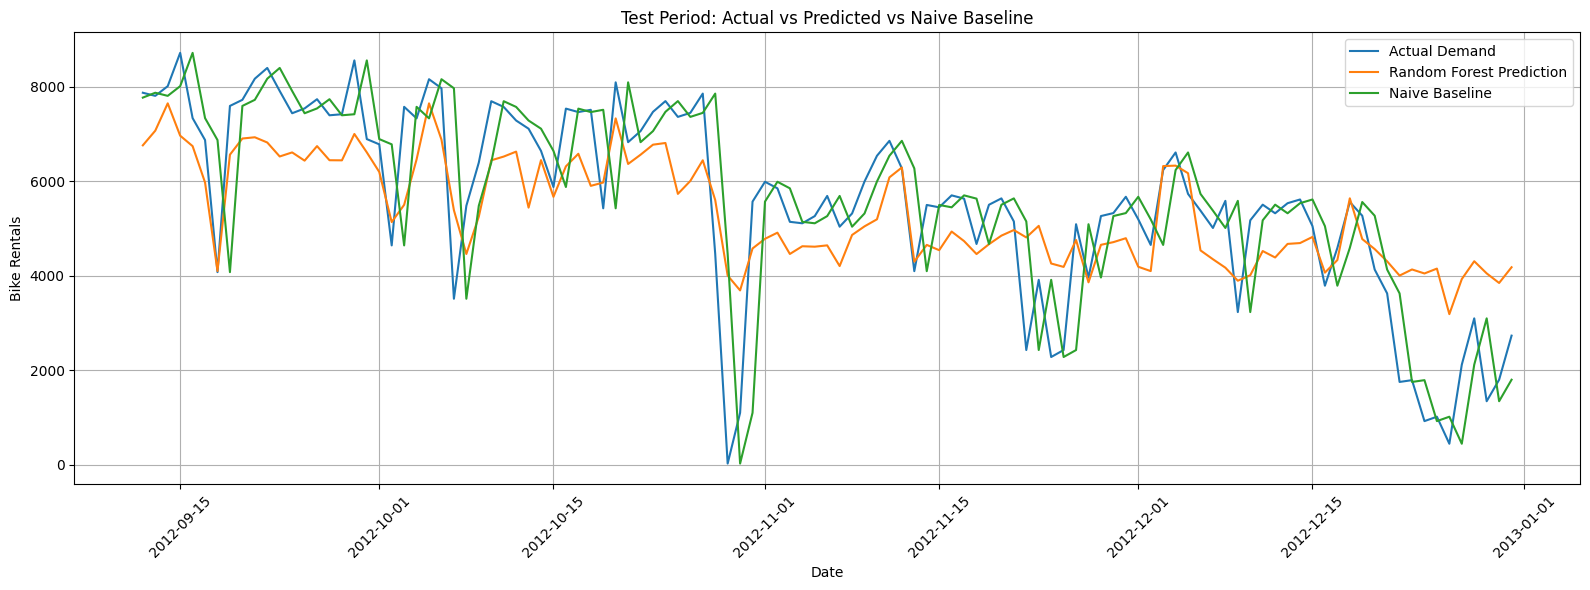

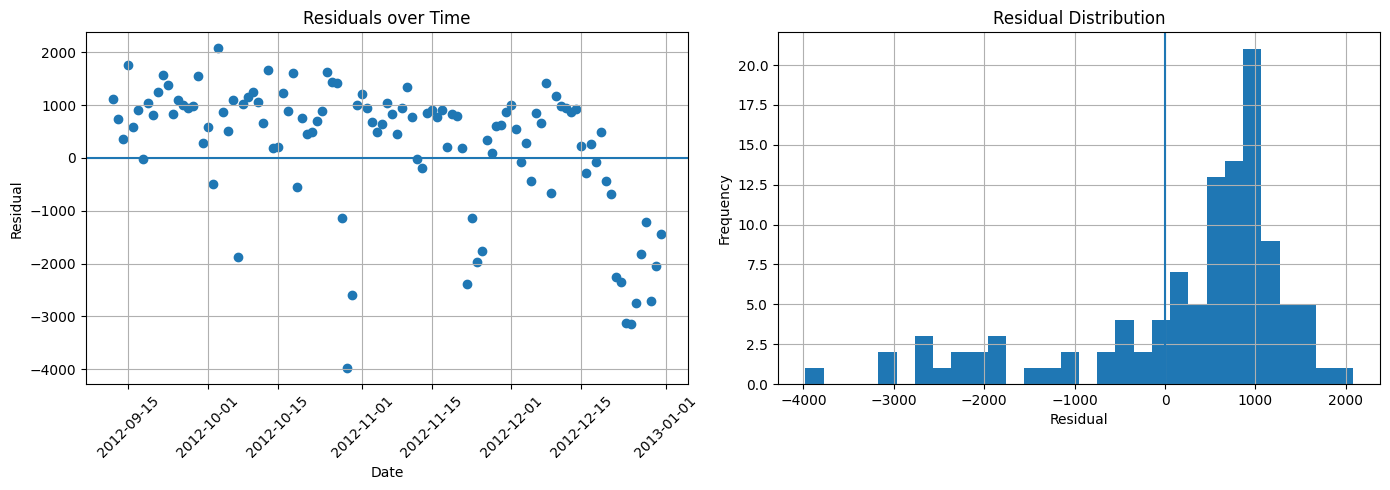


Residual Statistics:
Mean: 246.41
Std:  1230.79
Min:  -3978.71
Max:  2074.53


In [37]:
# evaluate the model on unseen test data

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

print("EVALUATION ON TEST PERIOD")

# predict target values for the test set
y_test_pred = model.predict(X_test)

# calculate error metrics to measure prediction quality
test_rmse = np.sqrt(np.mean((y_test.values - y_test_pred) ** 2))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print("\nModel Performance Metrics:")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE:  {test_mae:.2f}")
print(f"MAPE: {test_mape:.2f}%")

# create a simple baseline using yesterday's demand as prediction
y_naive = df["target"].shift(1).loc[y_test.index].values

# calculate baseline error metrics
naive_rmse = np.sqrt(np.mean((y_test.values - y_naive) ** 2))
naive_mae = mean_absolute_error(y_test, y_naive)
naive_mape = mean_absolute_percentage_error(y_test, y_naive) * 100

print("\nNaive Baseline Metrics:")
print(f"RMSE: {naive_rmse:.2f}")
print(f"MAE:  {naive_mae:.2f}")
print(f"MAPE: {naive_mape:.2f}%")

# calculate how much better the model is compared to the baseline
rmse_improvement = (naive_rmse - test_rmse) / naive_rmse * 100
mae_improvement = (naive_mae - test_mae) / naive_mae * 100
mape_improvement = (naive_mape - test_mape) / naive_mape * 100

print("\nImprovement over Naive Baseline:")
print(f"RMSE: {rmse_improvement:+.1f}%")
print(f"MAE:  {mae_improvement:+.1f}%")
print(f"MAPE: {mape_improvement:+.1f}%")

# get the dates that belong to the test set
dates_test = df.loc[y_test.index, "datetime"]

# plot actual values, model predictions, and baseline predictions
plt.figure(figsize=(16, 6))
plt.plot(dates_test, y_test.values, label="Actual Demand")
plt.plot(dates_test, y_test_pred, label="Random Forest Prediction")
plt.plot(dates_test, y_naive, label="Naive Baseline")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Bike Rentals")
plt.title("Test Period: Actual vs Predicted vs Naive Baseline")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# calculate residuals (difference between real and predicted values)
residuals = y_test.values - y_test_pred

# visualize residuals over time and as a distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.scatter(dates_test, residuals)
ax1.axhline(0)
ax1.set_title("Residuals over Time")
ax1.set_xlabel("Date")
ax1.set_ylabel("Residual")
ax1.tick_params(axis="x", rotation=45)
ax1.grid(True)

ax2.hist(residuals, bins=30)
ax2.axvline(0)
ax2.set_title("Residual Distribution")
ax2.set_xlabel("Residual")
ax2.set_ylabel("Frequency")
ax2.grid(True)

plt.tight_layout()
plt.show()

# print basic statistics of the residuals
print("\nResidual Statistics:")
print(f"Mean: {residuals.mean():.2f}")
print(f"Std:  {residuals.std():.2f}")
print(f"Min:  {residuals.min():.2f}")
print(f"Max:  {residuals.max():.2f}")


### Forecast

C:\Users\pi890\AppData\Local\Temp\ipykernel_28272\321574336.py:97: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4354.875156926407' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  forecast_df.iloc[-1, forecast_df.columns.get_loc("target")] = y_pred


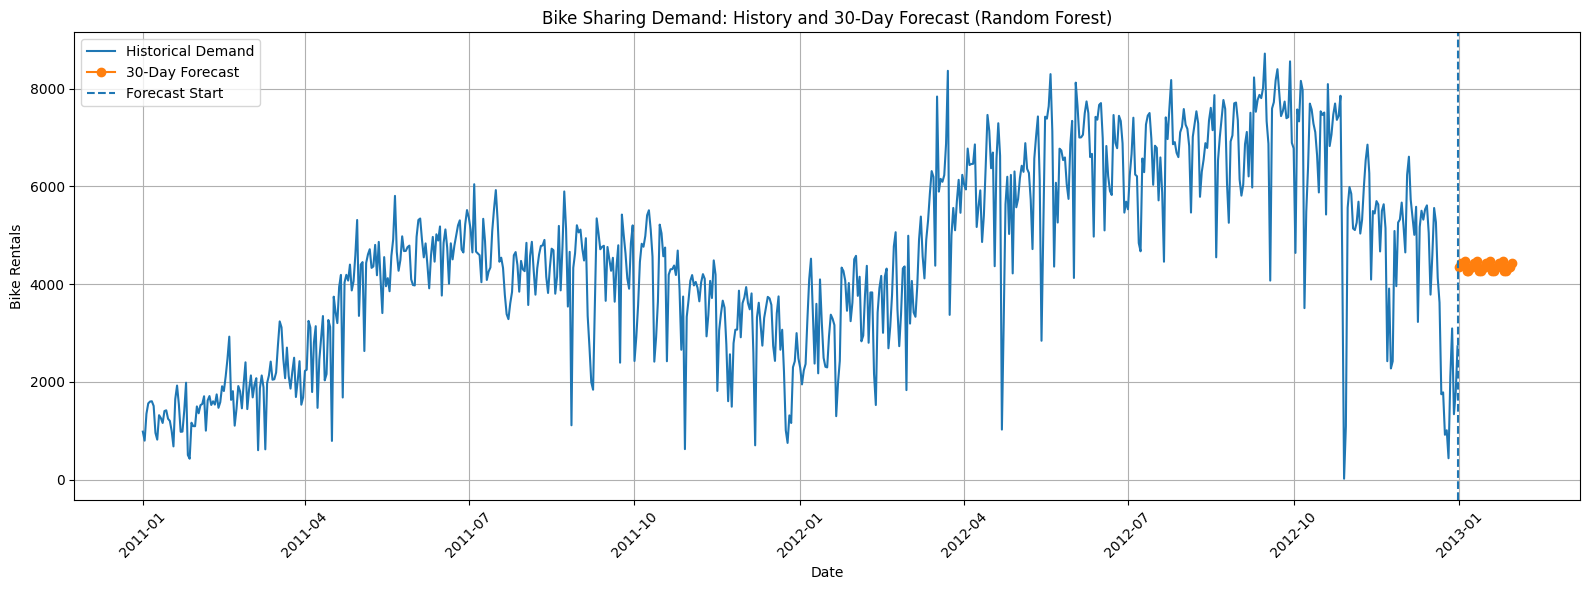

Forecast Summary (First 30 Days)
      Date   Weekday  Predicted Rentals
2013-01-01   Tuesday               4354
2013-01-02 Wednesday               4435
2013-01-03  Thursday               4435
2013-01-04    Friday               4471
2013-01-05  Saturday               4265
2013-01-06    Sunday               4272
2013-01-07    Monday               4333
2013-01-08   Tuesday               4354
2013-01-09 Wednesday               4435
2013-01-10  Thursday               4435
2013-01-11    Friday               4471
2013-01-12  Saturday               4265
2013-01-13    Sunday               4272
2013-01-14    Monday               4333
2013-01-15   Tuesday               4354
2013-01-16 Wednesday               4435
2013-01-17  Thursday               4435
2013-01-18    Friday               4471
2013-01-19  Saturday               4265
2013-01-20    Sunday               4272
2013-01-21    Monday               4333
2013-01-22   Tuesday               4354
2013-01-23 Wednesday               4435
2013-01

In [36]:
import datetime
import matplotlib.pyplot as plt

# create a copy of the data that already contains lag features
forecast_df = df_lag.copy()

# determine the start date for the forecast (day after last known date)
last_date = forecast_df["datetime"].iloc[-1]
start_forecast_date = last_date + pd.Timedelta(days=1)

# use weather values from the last known day for all future days
last_day_data = forecast_df.iloc[-1]
last_temp = last_day_data["temperature_feature"]
last_humidity = last_day_data["humidity_feature"]
last_windspeed = last_day_data["windspeed_feature"]

# lists to store forecast dates and predicted values
forecast_dates = []
forecast_values = []

# generate the forecast one day at a time
for day in range(30):
    current_date = start_forecast_date + pd.Timedelta(days=day)

    # define input features for the new day
    new_row = {
        "datetime": current_date,
        "temperature_feature": last_temp,
        "humidity_feature": last_humidity,
        "windspeed_feature": last_windspeed,
        "season_feature": 1,
        "weather_feature": 1,
        "weekday_feature": current_date.weekday(),
        "holiday_feature": 0,
        "working_day_feature": 1 if current_date.weekday() < 5 else 0,
        "target": 0
    }

    # use previous values as lag features
    new_row["lag_1"] = forecast_df["target"].iloc[-1]

    if len(forecast_df) >= 7:
        new_row["lag_7"] = forecast_df["target"].iloc[-7]
    else:
        new_row["lag_7"] = forecast_df["target"].mean()

    if len(forecast_df) >= 24:
        new_row["lag_24"] = forecast_df["target"].iloc[-24]
    else:
        new_row["lag_24"] = forecast_df["target"].mean()

    if len(forecast_df) >= 168:
        new_row["lag_168"] = forecast_df["target"].iloc[-168]
    else:
        new_row["lag_168"] = forecast_df["target"].mean()

    # add the new row to the forecast dataframe
    forecast_df = pd.concat([forecast_df, pd.DataFrame([new_row])], ignore_index=True)

    # one-hot encode categorical features
    df_categorical_encoded = pd.get_dummies(
        forecast_df[["season_feature", "weather_feature", "weekday_feature"]],
        dtype=int
    )

    # select numeric features
    df_numeric = forecast_df[
        [
            "temperature_feature",
            "humidity_feature",
            "windspeed_feature",
            "holiday_feature",
            "working_day_feature",
            "lag_1",
            "lag_7",
            "lag_24",
            "lag_168",
        ]
    ]

    # combine all features
    X_forecast = pd.concat(
        [df_categorical_encoded, df_numeric, pd.to_numeric(forecast_df["datetime"])],
        axis=1
    )

    # ensure feature order matches the training data
    X_forecast = X_forecast.reindex(columns=X_train.columns, fill_value=0)

    # select the newest row for prediction
    X_new = X_forecast.iloc[[-1]]

    # predict demand for the current day using Random Forest
    y_pred = model.predict(X_new)[0]

    # store the prediction back into the dataframe
    forecast_df.iloc[-1, forecast_df.columns.get_loc("target")] = y_pred

    # save results for plotting and summary
    forecast_dates.append(current_date)
    forecast_values.append(y_pred)

# plot historical data and forecasted values
plt.figure(figsize=(16, 6))
plt.plot(df["datetime"], df["target"], label="Historical Demand")
plt.plot(forecast_dates, forecast_values, label="30-Day Forecast", marker="o")
plt.axvline(x=last_date, linestyle="--", label="Forecast Start")
plt.xlabel("Date")
plt.ylabel("Bike Rentals")
plt.title("Bike Sharing Demand: History and 30-Day Forecast (Random Forest)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# create a table with the forecast results
forecast_summary = pd.DataFrame({
    "Date": [d.date() for d in forecast_dates],
    "Weekday": [d.strftime("%A") for d in forecast_dates],
    "Predicted Rentals": [int(v) for v in forecast_values],
})

# show the first 30 forecasted days
print("Forecast Summary (First 30 Days)")
print(forecast_summary.head(30).to_string(index=False))
